## Linear Regression Multiple Variables
***
In exercise folder (same level as this notebook on github) there is hiring.csv. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

2 yr experience, 9 test score, 6 interview score

12 yr experience, 10 test score, 10 interview score

In [18]:
# importing essential libraries
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
# loading the dataset
df = pd.read_csv("hiring.csv")
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [20]:
# filling value with zero
df.experience = df.experience.fillna("zero")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [21]:
# replacing numbers in text to numbers in decimal format
df.experience = df.replace({'zero':0,'five':5,'two':2,'seven':7,'three':3,'ten':10,'eleven':11})

In [22]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [23]:
# calculating mean of test score
import math
median_test_score = math.floor(df['test_score(out of 10)'].mean())
median_test_score

7

In [24]:
# filling median score of test score with NaN values
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_test_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,7.0,7,72000
7,11.0,7.0,8,80000


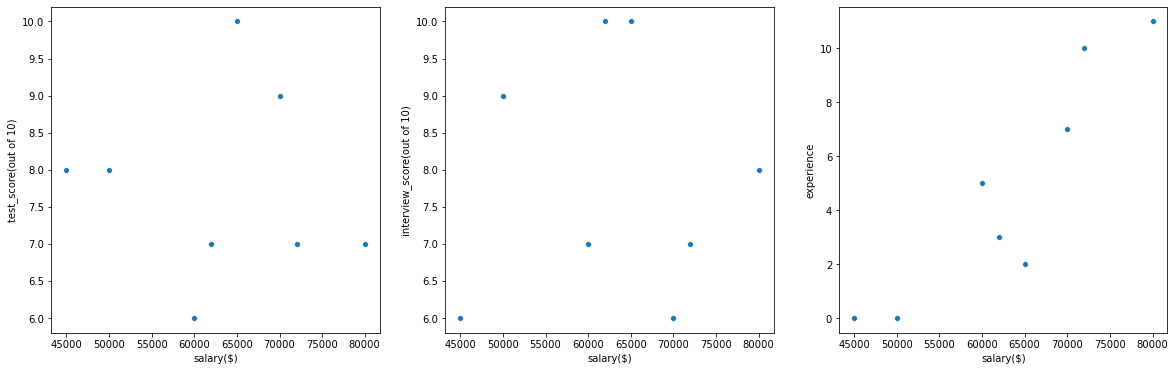

In [25]:
# plotting how price (dependent) is behaving with respect to other independent features
fig, ax = plt.subplots(1,3,figsize=(20,6))
sns.scatterplot(df['salary($)'],df['test_score(out of 10)'],ax=ax[0])
sns.scatterplot(df['salary($)'],df['interview_score(out of 10)'],ax=ax[1])
sns.scatterplot(df['salary($)'],df['experience'],ax=ax[2])
plt.show()

- by looking at the grapg it is difficult to infere the price. Basically, all these factors combined will give the price. So, we will run a Linear Regression on it.

In [13]:
# splitting the data into X and y
# creating instance of Linear Regression
# and applying Linear Regression
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

**Predict salary for 2 yr experience, 9 test score, 6 interview score**

In [15]:
reg.predict([[2,9,6]])

array([53713.86677124])

**Predict salary 12 yr experience, 10 test score, 10 interview score**

In [16]:
reg.predict([[12,10,10]])

array([93747.79628651])